In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

* The ID field contains the patient identifiers.
* The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.
* The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

In [4]:
data = pd.read_csv("cell_samples.csv")
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data.shape

(699, 11)

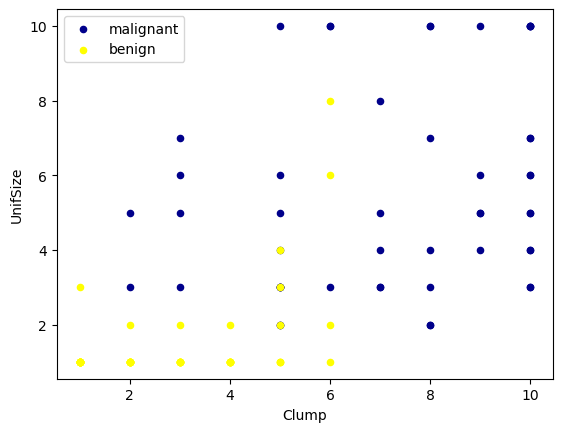

In [11]:
ax = data[data['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
data[data['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

Mapping data into a higher dimensional space is called kerneling.
Kernel functions:
- Linear
- Polynomial
- Sigmoid
- Radial basis function (RBF)

Advantages:
- memory efficient: uses a subset of training points in the decision function (subset: support vectors)
- accurate in high dimensional space

Disadventages: 
- Prone to over-fitting (if the number of features is much greater than the number of samples) 
- small dataset (<1000 rows) 
- no probability estimation 
- longer training time duration

* Image recognition
* Text category assigment
* Bioinformatic data (Gene expression classifition etc.)
* Spam detection
* Medical dataset

In [6]:
data.sample(5)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
517,1320077,1,1,1,1,1,1,2,1,1,2
556,1321264,5,2,2,2,1,1,2,1,1,2
553,1306339,4,4,2,1,2,5,2,1,2,2
648,1315807,5,10,10,10,10,2,10,10,10,4
516,1320077,1,1,1,1,1,1,1,1,1,2


In [7]:
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [13]:
data = data[pd.to_numeric(data['BareNuc'], errors='coerce').notnull()]
data['BareNuc'] = data['BareNuc'].astype('int')

In [15]:
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [18]:
feature_data = data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_data)

In [19]:
X[0:10]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1],
       [ 8, 10, 10,  8,  7, 10,  9,  7,  1],
       [ 1,  1,  1,  1,  2, 10,  3,  1,  1],
       [ 2,  1,  2,  1,  2,  1,  3,  1,  1],
       [ 2,  1,  1,  1,  2,  1,  1,  1,  5],
       [ 4,  2,  1,  1,  2,  1,  2,  1,  1]], dtype=int64)

In [21]:
data['Class'] = data['Class'].astype('int')
y = np.asarray(data['Class'])

In [22]:
y[0:10]

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2])

# Train/test split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)

In [24]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


# Modelling

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [25]:
from sklearn import svm

clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [26]:
yhat = clf.predict(X_test)
yhat[0:10]

array([4, 4, 4, 4, 4, 4, 2, 2, 4, 4])

# Evaluation

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [30]:
cnf_matrix = confusion_matrix(y_test, yhat)
cnf_matrix

array([[86,  3],
       [ 1, 47]], dtype=int64)

In [32]:
report = classification_report(y_test, yhat)
print(report)

              precision    recall  f1-score   support

           2       0.99      0.97      0.98        89
           4       0.94      0.98      0.96        48

    accuracy                           0.97       137
   macro avg       0.96      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



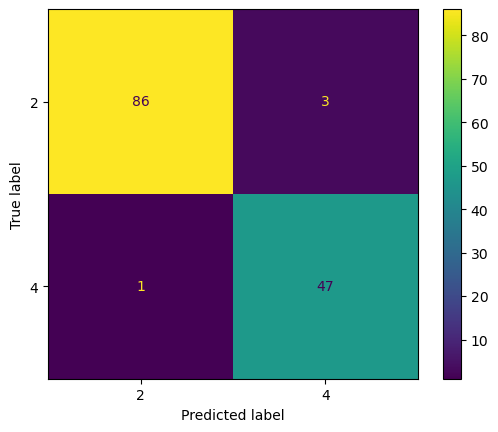

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=[2,4])
disp.plot()

In [35]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9709349565971047

In [37]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=2)

0.9555555555555556